# CPSC 483 - Introduction to Machine Learning
## Spring 2021   Section 2

## Project 5  Group 11


##  <p>Katelyn Choi &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Malyaj Sirothia&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Manikanta Reddy Nayini</p> 

## Classifier Decision Boundaries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.metrics import accuracy_score

#### 1. Use read_csv() to load and examine each dataset.

In [2]:
data1 = pd.read_csv('dataset1.csv', header = None)
data2 = pd.read_csv('dataset2.csv', header = None)
data3 = pd.read_csv('dataset3.csv', header = None)

#naming the columns to x, y and z
data1.rename(columns={0: 'x', 1: 'y', 2: 'z'}, inplace=True)
data2.rename(columns={0: 'x', 1: 'y', 2: 'z'}, inplace=True)
data3.rename(columns={0: 'x', 1: 'y', 2: 'z'}, inplace=True)

#### 2. Use logistic regression to fit() and score() a binary classifier for dataset 1. How accurate are the model’s predictions?

In [3]:
## dataset 1

X1 = data1[['x','y']]
t1 = data1[['z']]
reg = LinearRegression().fit(X1, t1)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X1,t1))

[[0.02248981 0.02405022]]
[-0.20225849]
0.9054881432973778


#### 3. Repeat experiment (2) for dataset 2. How well does it score?


In [4]:
## dataset 2

X2 = data2[['x','y']]
t2 = data2[['z']]
reg = LinearRegression().fit(X2, t2)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X2,t2))

[[-0.00131472 -0.00030403]]
[0.52444247]
0.0004986773183582871


#### 4. Create separate scatterplots for datasets 1 and 2, plotting points from class 0 with a different color and marker from points in class 1. What accounts for the discrepancies between experiments (2) and (3)?


<AxesSubplot:xlabel='x', ylabel='y'>

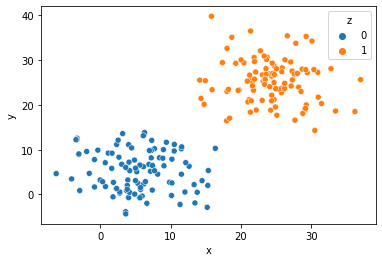

In [5]:
## dataset 1
sns.scatterplot(data = data1, x = "x", y = "y", hue="z")

<AxesSubplot:xlabel='x', ylabel='y'>

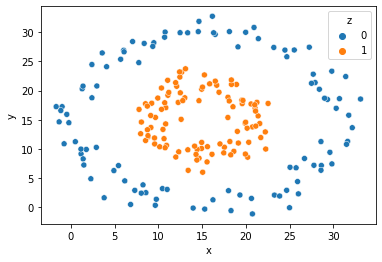

In [6]:
## dataset 2

sns.scatterplot(data = data2, x = "x", y = "y", hue="z")

#### 5. Fit and score Gaussian Naive Bayes classifiers for datasets 1 and 2. How well do these classifiers score compared to logistic regression?


In [7]:
## dataset 1

x_set1 = data1[['x','y']]
t_set1 = data1['z']
gnb = GaussianNB()
gnb.fit(x_set1, t_set1)
pred = gnb.predict(x_set1)
accuracy = accuracy_score(t_set1, pred)*100
R_sq_ds = gnb.score(x_set1, t_set1)
print('accuracy--->', accuracy)
print('R^2--->', R_sq_ds)

print(type(x_set1))

accuracy---> 100.0
R^2---> 1.0
<class 'pandas.core.frame.DataFrame'>


In [8]:
## dataset 2

x_set2 = data2[['x','y']]
t_set2 = data2['z']
gnb = GaussianNB()
gnb.fit(x_set2, t_set2)
pred = gnb.predict(x_set2)
accuracy = accuracy_score(t_set2, pred)*100
R_sq_ds = gnb.score(x_set2, t_set2)
print('accuracy--->', accuracy)
print('R^2--->', R_sq_ds)

accuracy---> 100.0
R^2---> 1.0


#### 6. Repeat experiment (5) with K-Nearest Neighbor classifiers.


In [9]:
## dataset 1

knn1 = KNeighborsClassifier(n_neighbors=3)
knn_model_1 = knn1.fit(x_set1, t_set1.values.ravel())
knn_model_1.score(x_set1, t_set1.values.ravel())

1.0

In [10]:
## dataset 2

knn1 = KNeighborsClassifier(n_neighbors=3)
knn_model_1 = knn1.fit(x_set2, t_set2.values.ravel())
knn_model_1.score(x_set2, t_set2.values.ravel())

1.0

#### 7. Use the code from KV Subbaiah Setty’s tutorial How To Plot A Decision Boundary For Machine Learning Algorithms in Python as a guide, plot the decision boundaries for each classifier and dataset. What differences do you observe?


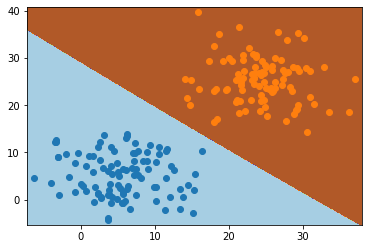

In [11]:
##Plotting dataset 1 Naive Bayes decision boundary graphs

X1 = np.array(data1[['x','y']])
y1 = np.array(data1[['z']])

min1, max1 = np.array(data1[['x']].min())-1, np.array(data1[['x']].max())+1
min2, max2 = np.array(data1[['y']].min())-1, np.array(data1[['y']].max())+1

x1grid = np.arange(min1, max1, 0.1) 
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten() 
r1, r2 = r1.reshape((len (r1), 1)), r2.reshape (len(r2), 1)

grid = np.hstack((r1, r2)) 
gnb = GaussianNB()
model = gnb.fit(x_set1, t_set1)
yhat = gnb.predict(grid)
zz = yhat.reshape(xx.shape)



plt.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(2):
    row_ix = np.where(t_set1 == class_value)
    #plt.scatter(data1[['x']], data1[['y']], cmap='Paired')
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], cmap='Paired')

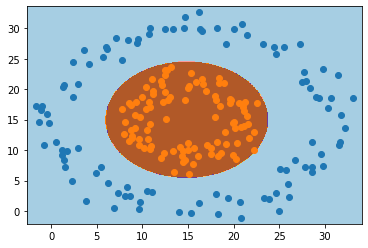

In [12]:
##Plotting dataset 2 Naive Bayes decision boundary graphs

X2 = np.array(data2[['x','y']])
y2 = np.array(data2[['z']])

min1, max1 = np.array(data2[['x']].min())-1, np.array(data2[['x']].max())+1
min2, max2 = np.array(data2[['y']].min())-1, np.array(data2[['y']].max())+1

x1grid = np.arange(min1, max1, 0.1) 
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten() 
r1, r2 = r1.reshape((len (r1), 1)), r2.reshape (len(r2), 1)

grid = np.hstack((r1, r2)) 
gnb = GaussianNB()
model = gnb.fit(x_set2, t_set2)
yhat = gnb.predict(grid)
zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(2):
    row_ix = np.where(t_set2 == class_value)
    #plt.scatter(data1[['x']], data1[['y']], cmap='Paired')
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], cmap='Paired')

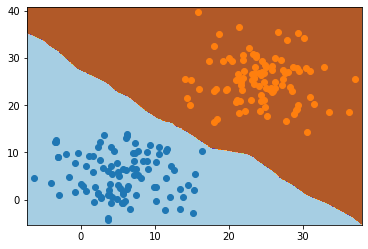

In [13]:
##Plotting KNN graph for dataset 1

X1 = np.array(data1[['x','y']])
y1 = np.array(data1[['z']])

min1, max1 = np.array(data1[['x']].min())-1, np.array(data1[['x']].max())+1
min2, max2 = np.array(data1[['y']].min())-1, np.array(data1[['y']].max())+1

x1grid = np.arange(min1, max1, 0.1) 
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten() 
r1, r2 = r1.reshape((len (r1), 1)), r2.reshape (len(r2), 1)

grid = np.hstack((r1, r2)) 
knn1 = KNeighborsClassifier(n_neighbors=3)
model = knn1.fit(x_set1, t_set1.values.ravel())
yhat = knn1.predict(grid)
zz = yhat.reshape(xx.shape)


plt.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(2):
    row_ix = np.where(t_set1 == class_value)
    #plt.scatter(data1[['x']], data1[['y']], cmap='Paired')
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], cmap='Paired')

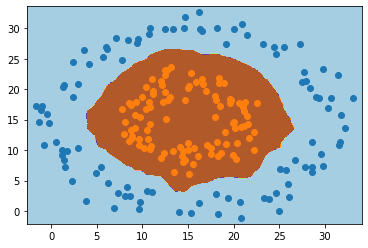

In [14]:
##Plotting KNN graph for dataset 2

X2 = np.array(data2[['x','y']])
y2 = np.array(data2[['z']])

min1, max1 = np.array(data2[['x']].min())-1, np.array(data2[['x']].max())+1
min2, max2 = np.array(data2[['y']].min())-1, np.array(data2[['y']].max())+1

x1grid = np.arange(min1, max1, 0.1) 
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten() 
r1, r2 = r1.reshape((len (r1), 1)), r2.reshape (len(r2), 1)

grid = np.hstack((r1, r2)) 
knn2 = KNeighborsClassifier(n_neighbors=3)
model = knn2.fit(x_set2, t_set2.values.ravel())
yhat = knn2.predict(grid)
zz = yhat.reshape(xx.shape)


plt.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(2):
    row_ix = np.where(t_set2 == class_value)
    #plt.scatter(data1[['x']], data1[['y']], cmap='Paired')
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], cmap='Paired')

#### 8. Now repeat experiments (2), (5), (6), and (7) with dataset 3.


In [15]:
#dataset 3
## Logistic Regression

X = data3[['x','y']]
t = data3[['z']]
reg = LinearRegression().fit(X, t)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X,t))

[[-0.03971734  0.01457325]]
[1.05469273]
0.6429948378418937


In [16]:
## Naive Bayes

x_set3 = data3[['x','y']]
t_set3 = data3['z']
gnb = GaussianNB()
gnb.fit(x_set3, t_set3)
pred = gnb.predict(x_set3)
accuracy = accuracy_score(t_set3, pred)*100
print(accuracy)

88.5


In [17]:
## k-nearest Neighbors


knn1 = KNeighborsClassifier(n_neighbors=3)
knn_model_1 = knn1.fit(x_set3, t_set3.values.ravel())
knn_model_1.score(x_set3, t_set3.values.ravel())

1.0

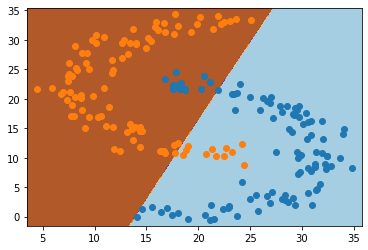

In [18]:
## Plotting decision boundaries of GNB for dataset 3

X3 = np.array(data3[['x','y']])
y3 = np.array(data3[['z']])

min1, max1 = np.array(data3[['x']].min())-1, np.array(data3[['x']].max())+1
min2, max2 = np.array(data3[['y']].min())-1, np.array(data3[['y']].max())+1

x1grid = np.arange(min1, max1, 0.1) 
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten() 
r1, r2 = r1.reshape((len (r1), 1)), r2.reshape (len(r2), 1)

grid = np.hstack((r1, r2)) 
gnb = GaussianNB()
model = gnb.fit(x_set3, t_set3)
yhat = gnb.predict(grid)
zz = yhat.reshape(xx.shape)


plt.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(2):
    row_ix = np.where(t_set3 == class_value)
    plt.scatter(X3[row_ix, 0], X3[row_ix, 1], cmap='Paired')

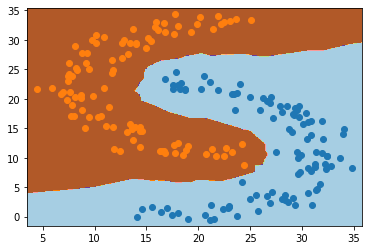

In [19]:
##Plotting KNN graph for dataset 3

min1, max1 = np.array(data3[['x']].min())-1, np.array(data3[['x']].max())+1
min2, max2 = np.array(data3[['y']].min())-1, np.array(data3[['y']].max())+1

x1grid = np.arange(min1, max1, 0.1) 
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten() 
r1, r2 = r1.reshape((len (r1), 1)), r2.reshape (len(r2), 1)

grid = np.hstack((r1, r2)) 
knn3 = KNeighborsClassifier(n_neighbors=3)
model = knn3.fit(x_set3, t_set3.values.ravel())
yhat = knn3.predict(grid)
zz = yhat.reshape(xx.shape)


plt.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(2):
    row_ix = np.where(t_set3 == class_value)
    #plt.scatter(data1[['x']], data1[['y']], cmap='Paired')
    plt.scatter(X3[row_ix, 0], X3[row_ix, 1], cmap='Paired')